In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def normalize_and_encode(dataframe):
    column_names_to_not_normalize = ['result']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp

    le = preprocessing.LabelEncoder()
    le.fit([ "H", "A", "D"])
    dataframe.loc[:,['result']]=le.transform(dataframe['result'])
    
    return dataframe

def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['result']).values
    y = dataframe[['result']].values
    return X,y

df01 = pd.read_csv('../data/sliding01.csv', sep=',', index_col=0)
df02 = pd.read_csv('../data/sliding02_shots.csv', sep=',', index_col=0)
df03 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)

n01 = normalize_and_encode(df01)
n02 = normalize_and_encode(df02)
n03 = normalize_and_encode(df03)

train01, test01 = train_test_split(n01, test_size=0.1)
print(len(train01), 'train examples')
print(len(test01), 'test examples')

train02, test02 = train_test_split(n02, test_size=0.1)
print(len(train02), 'train examples')
print(len(test02), 'test examples')

train03, test03 = train_test_split(n03, test_size=0.1)
print(len(train03), 'train examples')
print(len(test03), 'test examples')


train_X01,train_y01 = get_X_and_y(train01)
train_X02,train_y02 = get_X_and_y(train02)
train_X03,train_y03 = get_X_and_y(train03)

test_X01,test_y01 = get_X_and_y(test01)
test_X02,test_y02 = get_X_and_y(test02)
test_X03,test_y03 = get_X_and_y(test03)

18740 train examples
2083 test examples
6329 train examples
704 test examples
6329 train examples
704 test examples


In [3]:
n01

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,2,0.049957,0.165301,0.330601,0.183667,0.110200,0.073467,0.514268,0.367334,0.073467,0.073467,0.220401,0.293868,0.514268
1,1,0.077897,0.103862,0.121172,0.103862,0.138483,0.103862,0.553931,0.415448,0.138483,0.103862,0.103862,0.484690,0.415448
2,1,0.109311,0.117119,0.105407,0.195198,0.078079,0.117119,0.390396,0.312317,0.156158,0.156158,0.078079,0.585594,0.507514
3,0,0.068789,0.117049,0.155945,0.180075,0.108045,0.072030,0.648271,0.396166,0.108045,0.108045,0.144060,0.360151,0.396166
4,2,0.108097,0.154424,0.205899,0.102949,0.205899,0.205899,0.308848,0.463272,0.051475,0.308848,0.154424,0.360322,0.514746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20818,2,0.162536,0.123527,0.055262,0.097521,0.065014,0.162536,0.260057,0.487607,0.065014,0.130029,0.130029,0.325071,0.682650
20819,2,0.061498,0.110696,0.113771,0.092247,0.092247,0.122995,0.307489,0.584228,0.030749,0.122995,0.153744,0.215242,0.645726
20820,2,0.073697,0.153535,0.184242,0.122828,0.163770,0.122828,0.409426,0.368484,0.204713,0.081885,0.122828,0.614139,0.368484
20821,2,0.044350,0.175065,0.300111,0.066691,0.100037,0.166729,0.400149,0.466840,0.100037,0.100037,0.133383,0.366803,0.533532


In [4]:
n02

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039230,0.057061,0.488587,0.238944,0.417260,0.189015,0.028531,0.007133,0.000000,0.053495,0.021398,0.574178,0.278173,0.256775,0.106990
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059110,0.495044,0.236439,0.557848,0.284465,0.011083,0.011083,0.014777,0.040638,0.066498,0.384213,0.162552,0.321409,0.132997
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451585,0.218266,0.466638,0.210740,0.007526,0.007526,0.022579,0.041395,0.056448,0.504270,0.222029,0.376321,0.173108
3,2,0.010289,0.010289,0.007281,0.015829,0.006332,0.009497,0.069647,0.037989,0.560339,0.259592,0.234266,0.117133,0.018995,0.009497,0.003166,0.060149,0.025326,0.535013,0.300747,0.357730,0.183614
4,2,0.004077,0.020384,0.064551,0.023782,0.006795,0.003397,0.050961,0.027179,0.546982,0.244613,0.251408,0.105320,0.010192,0.006795,0.016987,0.033974,0.057756,0.485829,0.234421,0.455252,0.234421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048694,0.324626,0.174487,0.474766,0.243470,0.008116,0.016231,0.016231,0.040578,0.085214,0.482881,0.235354,0.454477,0.263759
7029,2,0.009960,0.017929,0.018427,0.014941,0.009960,0.024901,0.044822,0.104584,0.443238,0.234070,0.458179,0.229089,0.004980,0.019921,0.024901,0.034861,0.104584,0.517941,0.273911,0.313753,0.129485
7030,2,0.007617,0.015870,0.019044,0.012696,0.012696,0.016928,0.033855,0.033855,0.516293,0.249683,0.389336,0.211596,0.021160,0.008464,0.012696,0.063479,0.038087,0.355481,0.181972,0.499366,0.236987
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055483,0.491416,0.245708,0.392341,0.198152,0.011889,0.011889,0.015852,0.043593,0.067372,0.408193,0.210041,0.483490,0.214004


In [5]:
n03

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039229,0.057061,0.488583,0.238942,0.417257,0.189014,0.028530,0.007133,0.000000,0.053495,0.021398,0.574174,0.278171,0.256774,0.106989,0.001744,0.000586,0.001616,0.001077,0.001728,0.000686,0.001486,0.000713
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059109,0.495039,0.236437,0.557843,0.284463,0.011083,0.011083,0.014777,0.040638,0.066498,0.384210,0.162550,0.321406,0.132996,0.001764,0.000462,0.001884,0.000768,0.001563,0.000924,0.001529,0.001847
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451581,0.218264,0.466634,0.210738,0.007526,0.007526,0.022579,0.041395,0.056448,0.504266,0.222028,0.376318,0.173106,0.001819,0.000649,0.001699,0.001008,0.001657,0.000702,0.001731,0.001227
3,2,0.010289,0.010289,0.007281,0.015829,0.006331,0.009497,0.069646,0.037989,0.560335,0.259590,0.234264,0.117132,0.018994,0.009497,0.003166,0.060149,0.025326,0.535009,0.300745,0.357728,0.183613,0.001467,0.000849,0.001583,0.001027,0.001780,0.000633,0.001625,0.000437
4,2,0.004077,0.020384,0.064550,0.023782,0.006795,0.003397,0.050961,0.027179,0.546979,0.244612,0.251406,0.105319,0.010192,0.006795,0.016987,0.033974,0.057756,0.485826,0.234419,0.455249,0.234419,0.001519,0.000708,0.001423,0.000877,0.001639,0.000492,0.001749,0.000837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048693,0.324623,0.174485,0.474761,0.243467,0.008116,0.016231,0.016231,0.040578,0.085213,0.482876,0.235351,0.454472,0.263756,0.002181,0.000944,0.002081,0.000812,0.001978,0.000700,0.002355,0.001311
7029,2,0.009960,0.017928,0.018426,0.014940,0.009960,0.024900,0.044821,0.104582,0.443228,0.234064,0.458168,0.229084,0.004980,0.019920,0.024900,0.034861,0.104582,0.517929,0.273905,0.313745,0.129482,0.002630,0.000954,0.002490,0.002274,0.002634,0.000634,0.002055,0.004022
7030,2,0.007617,0.015870,0.019043,0.012696,0.012696,0.016927,0.033855,0.033855,0.516288,0.249680,0.389332,0.211593,0.021159,0.008464,0.012696,0.063478,0.038087,0.355477,0.181970,0.499360,0.236985,0.002047,0.000574,0.002300,0.000677,0.002166,0.001476,0.002008,0.000680
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055482,0.491412,0.245706,0.392337,0.198150,0.011889,0.011889,0.015852,0.043593,0.067371,0.408189,0.210039,0.483486,0.214002,0.001981,0.000767,0.002002,0.001110,0.002039,0.000823,0.001754,0.001248


In [6]:
#number of columns for training data
print(train_X01.shape[1])
print(train_X02.shape[1])
print(train_X03.shape[1])

13
21
29


In [7]:
model01 = tf.keras.Sequential([
  layers.Dense(13, activation='relu',input_shape=(train_X01.shape[1],)), # 13 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model02 = tf.keras.Sequential([
  layers.Dense(21, activation='relu',input_shape=(train_X02.shape[1],)), # 21 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model03 = tf.keras.Sequential([
  layers.Dense(29, activation='relu',input_shape=(train_X03.shape[1],)), # 29 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

early_stoping = EarlyStopping(patience=50)
validation_split = 0.2
epochs=500

In [8]:
model01.fit(train_X01, train_y01, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 14992 samples, validate on 3748 samples
Epoch 1/500
14992/14992 [==============================] - 2s 141us/sample - loss: 1.0338 - accuracy: 0.4880 - val_loss: 0.9954 - val_accuracy: 0.5104
Epoch 2/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9962 - accuracy: 0.5152 - val_loss: 0.9820 - val_accuracy: 0.5235
Epoch 3/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9858 - accuracy: 0.5195 - val_loss: 0.9772 - val_accuracy: 0.5192
Epoch 4/500
14992/14992 [==============================] - 1s 74us/sample - loss: 0.9800 - accuracy: 0.5249 - val_loss: 0.9715 - val_accuracy: 0.5366
Epoch 5/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9771 - accuracy: 0.5279 - val_loss: 0.9666 - val_accuracy: 0.5344
Epoch 6/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9765 - accuracy: 0.5290 - val_loss: 0.9734 - val_accuracy: 0.5312
Epoch 7/500
14992/14992 [=========================

Epoch 55/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9719 - accuracy: 0.5318 - val_loss: 0.9635 - val_accuracy: 0.5352
Epoch 56/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9725 - accuracy: 0.5317 - val_loss: 0.9637 - val_accuracy: 0.5390
Epoch 57/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9729 - accuracy: 0.5309 - val_loss: 0.9723 - val_accuracy: 0.5320
Epoch 58/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9721 - accuracy: 0.5315 - val_loss: 0.9639 - val_accuracy: 0.5336
Epoch 59/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9724 - accuracy: 0.5325 - val_loss: 0.9663 - val_accuracy: 0.5339
Epoch 60/500
14992/14992 [==============================] - 1s 85us/sample - loss: 0.9717 - accuracy: 0.5313 - val_loss: 0.9635 - val_accuracy: 0.5392
Epoch 61/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9719 - ac

14992/14992 [==============================] - 1s 72us/sample - loss: 0.9711 - accuracy: 0.5317 - val_loss: 0.9644 - val_accuracy: 0.5352
Epoch 110/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9704 - accuracy: 0.5337 - val_loss: 0.9646 - val_accuracy: 0.5350
Epoch 111/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9709 - accuracy: 0.5334 - val_loss: 0.9633 - val_accuracy: 0.5376
Epoch 112/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9712 - accuracy: 0.5332 - val_loss: 0.9637 - val_accuracy: 0.5358
Epoch 113/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9711 - accuracy: 0.5328 - val_loss: 0.9636 - val_accuracy: 0.5398
Epoch 114/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9707 - accuracy: 0.5311 - val_loss: 0.9682 - val_accuracy: 0.5334
Epoch 115/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9705 - accuracy:

In [9]:
model02.fit(train_X02, train_y02, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 1s 230us/sample - loss: 1.0593 - accuracy: 0.4582 - val_loss: 1.0368 - val_accuracy: 0.4676
Epoch 2/500
5063/5063 [==============================] - 0s 82us/sample - loss: 1.0306 - accuracy: 0.4811 - val_loss: 1.0047 - val_accuracy: 0.5395
Epoch 3/500
5063/5063 [==============================] - 0s 83us/sample - loss: 1.0100 - accuracy: 0.5114 - val_loss: 0.9860 - val_accuracy: 0.5253
Epoch 4/500
5063/5063 [==============================] - 0s 83us/sample - loss: 1.0022 - accuracy: 0.5119 - val_loss: 0.9783 - val_accuracy: 0.5506
Epoch 5/500
5063/5063 [==============================] - 0s 83us/sample - loss: 0.9973 - accuracy: 0.5147 - val_loss: 0.9743 - val_accuracy: 0.5513
Epoch 6/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9945 - accuracy: 0.5177 - val_loss: 0.9715 - val_accuracy: 0.5442
Epoch 7/500
5063/5063 [==============================] - 0s 85u

5063/5063 [==============================] - 1s 131us/sample - loss: 0.9729 - accuracy: 0.5297 - val_loss: 0.9552 - val_accuracy: 0.5529
Epoch 56/500
5063/5063 [==============================] - 0s 82us/sample - loss: 0.9731 - accuracy: 0.5285 - val_loss: 0.9598 - val_accuracy: 0.5553
Epoch 57/500
5063/5063 [==============================] - 1s 102us/sample - loss: 0.9750 - accuracy: 0.5285 - val_loss: 0.9554 - val_accuracy: 0.5537
Epoch 58/500
5063/5063 [==============================] - 0s 86us/sample - loss: 0.9723 - accuracy: 0.5323 - val_loss: 0.9654 - val_accuracy: 0.5355
Epoch 59/500
5063/5063 [==============================] - 0s 92us/sample - loss: 0.9737 - accuracy: 0.5303 - val_loss: 0.9540 - val_accuracy: 0.5513
Epoch 60/500
5063/5063 [==============================] - 0s 86us/sample - loss: 0.9728 - accuracy: 0.5329 - val_loss: 0.9544 - val_accuracy: 0.5529
Epoch 61/500
5063/5063 [==============================] - 0s 88us/sample - loss: 0.9719 - accuracy: 0.5295 - val_loss

Epoch 110/500
5063/5063 [==============================] - 0s 88us/sample - loss: 0.9700 - accuracy: 0.5272 - val_loss: 0.9532 - val_accuracy: 0.5537
Epoch 111/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9709 - accuracy: 0.5301 - val_loss: 0.9598 - val_accuracy: 0.5506
Epoch 112/500
5063/5063 [==============================] - 1s 139us/sample - loss: 0.9707 - accuracy: 0.5313 - val_loss: 0.9630 - val_accuracy: 0.5466
Epoch 113/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9708 - accuracy: 0.5347 - val_loss: 0.9535 - val_accuracy: 0.5498
Epoch 114/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9719 - accuracy: 0.5325 - val_loss: 0.9534 - val_accuracy: 0.5545
Epoch 115/500
5063/5063 [==============================] - 0s 81us/sample - loss: 0.9714 - accuracy: 0.5285 - val_loss: 0.9543 - val_accuracy: 0.5545
Epoch 116/500
5063/5063 [==============================] - 0s 87us/sample - loss: 0.9709 - accurac

In [10]:
model03.fit(train_X03, train_y03, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 1s 253us/sample - loss: 1.0695 - accuracy: 0.4525 - val_loss: 1.0463 - val_accuracy: 0.4724
Epoch 2/500
5063/5063 [==============================] - 0s 84us/sample - loss: 1.0462 - accuracy: 0.4655 - val_loss: 1.0213 - val_accuracy: 0.4850
Epoch 3/500
5063/5063 [==============================] - 0s 84us/sample - loss: 1.0241 - accuracy: 0.5013 - val_loss: 1.0018 - val_accuracy: 0.5269
Epoch 4/500
5063/5063 [==============================] - 0s 86us/sample - loss: 1.0079 - accuracy: 0.5151 - val_loss: 0.9904 - val_accuracy: 0.5387
Epoch 5/500
5063/5063 [==============================] - 0s 85us/sample - loss: 0.9988 - accuracy: 0.5197 - val_loss: 0.9854 - val_accuracy: 0.5284
Epoch 6/500
5063/5063 [==============================] - 0s 85us/sample - loss: 0.9946 - accuracy: 0.5212 - val_loss: 0.9963 - val_accuracy: 0.5182
Epoch 7/500
5063/5063 [==============================] - 0s 87u

5063/5063 [==============================] - 0s 86us/sample - loss: 0.9725 - accuracy: 0.5357 - val_loss: 0.9676 - val_accuracy: 0.5442
Epoch 56/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9716 - accuracy: 0.5311 - val_loss: 0.9683 - val_accuracy: 0.5387
Epoch 57/500
5063/5063 [==============================] - 0s 87us/sample - loss: 0.9724 - accuracy: 0.5347 - val_loss: 0.9740 - val_accuracy: 0.5474
Epoch 58/500
5063/5063 [==============================] - 0s 87us/sample - loss: 0.9711 - accuracy: 0.5341 - val_loss: 0.9675 - val_accuracy: 0.5458
Epoch 59/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9738 - accuracy: 0.5305 - val_loss: 0.9682 - val_accuracy: 0.5450
Epoch 60/500
5063/5063 [==============================] - 0s 91us/sample - loss: 0.9721 - accuracy: 0.5309 - val_loss: 0.9679 - val_accuracy: 0.5450
Epoch 61/500
5063/5063 [==============================] - 0s 88us/sample - loss: 0.9712 - accuracy: 0.5366 - val_loss: 

Epoch 110/500
5063/5063 [==============================] - 0s 86us/sample - loss: 0.9684 - accuracy: 0.5390 - val_loss: 0.9651 - val_accuracy: 0.5387
Epoch 111/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9678 - accuracy: 0.5376 - val_loss: 0.9660 - val_accuracy: 0.5450
Epoch 112/500
5063/5063 [==============================] - 0s 86us/sample - loss: 0.9682 - accuracy: 0.5366 - val_loss: 0.9643 - val_accuracy: 0.5466
Epoch 113/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9685 - accuracy: 0.5297 - val_loss: 0.9694 - val_accuracy: 0.5355
Epoch 114/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9696 - accuracy: 0.5327 - val_loss: 0.9647 - val_accuracy: 0.5387
Epoch 115/500
5063/5063 [==============================] - 1s 113us/sample - loss: 0.9683 - accuracy: 0.5366 - val_loss: 0.9648 - val_accuracy: 0.5458
Epoch 116/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9669 - accurac

Test Score: 0.976582554802549
Test Accuracy: 0.5237638


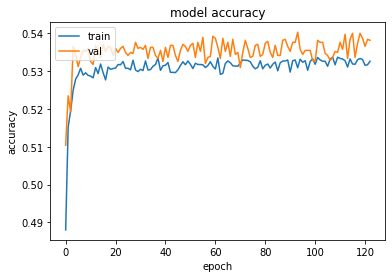

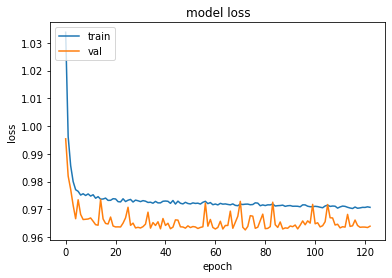

In [11]:
score = model01.evaluate(test_X01, test_y01, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model01.history.history['accuracy'])
plt.plot(model01.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model01.history.history['loss'])
plt.plot(model01.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9626468961889093
Test Accuracy: 0.5369318


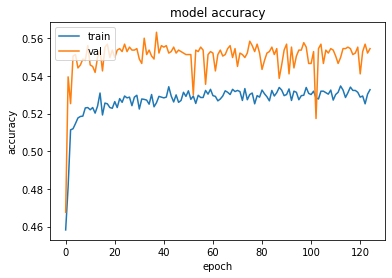

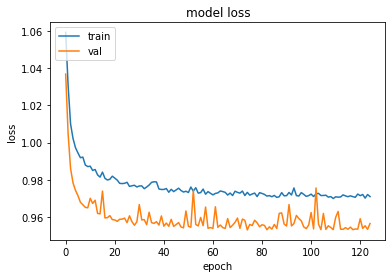

In [12]:
score = model02.evaluate(test_X02, test_y02, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model02.history.history['accuracy'])
plt.plot(model02.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model02.history.history['loss'])
plt.plot(model02.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9497374269095334
Test Accuracy: 0.52840906


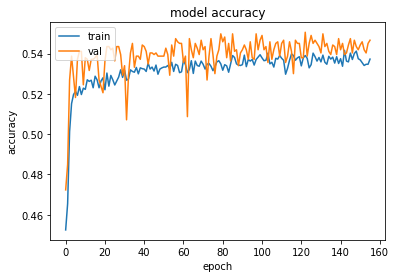

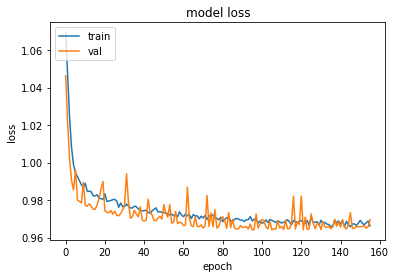

In [13]:
score = model03.evaluate(test_X03, test_y03, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model03.history.history['accuracy'])
plt.plot(model03.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model03.history.history['loss'])
plt.plot(model03.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
